In [10]:
import numpy as np
import json
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
embeddings = np.load("../90SIDs/full_embeddings.npy")
labels = np.load("../90SIDs/full_labels.npy")
indices = json.load(open("../90SIDs/indices.txt","r"))
left_out = ['90036','53951','24281','24761','29887','40932','41472','28584','50153','86782']

print("labels length", len(labels))
print("embeddings length", len(embeddings))
left_out

labels length 3087
embeddings length 3087


['90036',
 '53951',
 '24281',
 '24761',
 '29887',
 '40932',
 '41472',
 '28584',
 '50153',
 '86782']

In [8]:
cfmat = np.loadtxt("../90SIDs/train_cfmat_epoch_29.txt")

In [5]:
cfmat.shape

(90, 90)

In [17]:
left_out_embeddings = [embeddings[labels == label] for label in left_out]
len(left_out_embeddings)

10

In [21]:
from sklearn.decomposition import PCA
pca = PCA()
p = pca.fit_transform(embeddings)

In [19]:
import matplotlib.pyplot as plt
sidlist = np.array(left_out)
print(sidlist)
labels = np.array(labels)
print(labels)

['90036' '53951' '24281' '24761' '29887' '40932' '41472' '28584' '50153'
 '86782']
['10267' '10267' '10267' ... '99535' '99535' '99535']


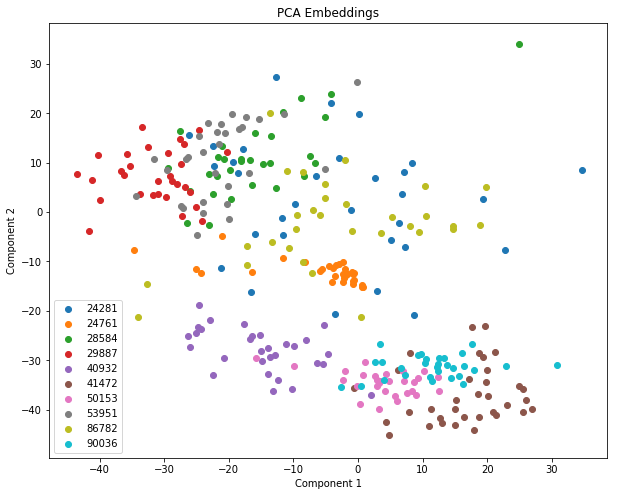

In [23]:
plt.figure(figsize=(10,8))
legend = []
plt.title("PCA Embeddings")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
for ind,i in enumerate(np.unique(sidlist)):
    plt.scatter(p[labels == i,0],p[labels == i,1])
    legend.append(i)
plt.legend(legend)
plt.savefig("PCA.PNG")

<IPython.core.display.Javascript object>


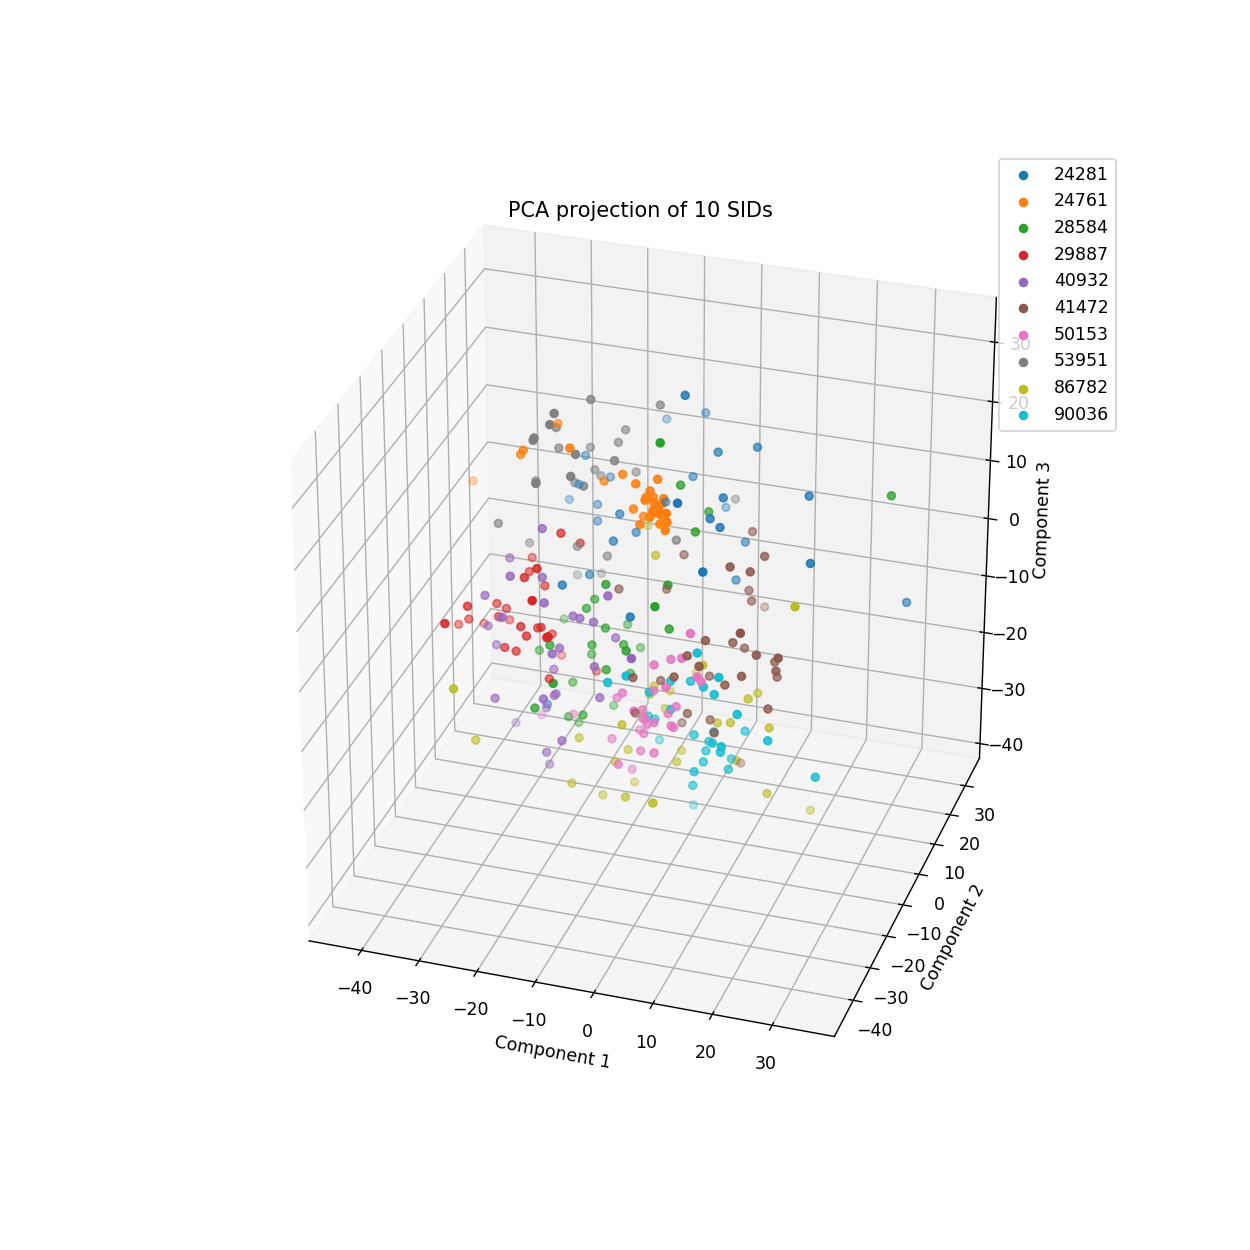

In [38]:
%matplotlib notebook
def rotate(angle):
    ax.view_init(azim=angle)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
plt.title("PCA projection of 10 SIDs")

for ind,i in enumerate(np.unique(sidlist)):
    ax.scatter(p[labels == i,0],p[labels == i,1],p[labels == i,2])
    legend.append(i)
plt.legend(legend)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.savefig("PCA_10_SIDs_3D.PNG")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=40)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [26]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for sid in np.unique(list(indices.keys())):
    train_data.append(embeddings[indices[sid][0]])
    train_labels.append(labels[indices[sid][0]])
    test_data.append(embeddings[indices[sid][1]])
    test_labels.append(labels[indices[sid][1]])
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

In [27]:
knn = KNeighborsClassifier(algorithm="brute")

In [28]:
knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
knn_vals = knn.predict(test_data)

In [30]:
print(classification_report(test_labels,knn_vals))

              precision    recall  f1-score   support

       10267       0.90      0.75      0.82        12
       10555       0.86      1.00      0.92        12
       13209       0.92      0.92      0.92        12
       13408       0.85      0.92      0.88        12
       13975       0.75      1.00      0.86        12
       14307       0.86      1.00      0.92        12
       14723       0.91      0.83      0.87        12
       14958       0.91      0.91      0.91        11
       16458       0.69      0.75      0.72        12
       17175       1.00      1.00      1.00        12
       17839       0.79      1.00      0.88        11
       24281       0.55      0.50      0.52        12
       24761       0.63      0.92      0.75        13
       27424       0.91      0.83      0.87        12
       28584       0.75      0.50      0.60        12
       28589       0.75      0.75      0.75        12
       29887       0.75      1.00      0.86        12
       30171       0.90    

       SID      Precision   Recall      F1      Support 
       24281       0.55      0.50      0.52        12
       24761       0.63      0.92      0.75        13
       28584       0.75      0.50      0.60        12
       29887       0.75      1.00      0.86        12
       40932       0.62      0.67      0.64        12
       41472       0.75      0.69      0.72        13
       50153       0.80      0.73      0.76        11
       53951       0.67      0.67      0.67        12
       86782       0.62      0.42      0.50        12
       90036       0.92      0.92      0.92        12

In [33]:
m = np.mean([0.55, 0.63, 0.75, 0.75, 0.62, 0.75, 0.80, 0.67, 0.62, 0.92])

In [35]:
m_std = np.std([0.55, 0.63, 0.75, 0.75, 0.62, 0.75, 0.80, 0.67, 0.62, 0.92])

In [37]:
print("Zero Examples in Training for 10 SIDs")
print("Mean Precision: ", m)
print("Mean Std: ", m_std)

Zero Examples in Training for 10 SIDs
Mean Precision:  0.7060000000000001
Mean Std:  0.10326664514740469
